In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
route_sale_df = pd.read_excel('/content/Input_data_timeseries.xlsx', parse_dates=['ORDER DATE'], index_col='ORDER DATE')
route_sale_df.head()

,ROUTE,NUMBER OF ACTUAL ORDERS
ORDER DATE,,
2022-01-01,BELGIUM__BELGIUM,0
2022-01-02,BELGIUM__BELGIUM,0
2022-01-03,BELGIUM__BELGIUM,0
2022-01-04,BELGIUM__BELGIUM,1
2022-01-05,BELGIUM__BELGIUM,3


## **Romania_belgium**

In [ ]:
route_sale_new1 = pd.read_excel('/content/romania_belgium.xlsx', parse_dates=['ORDER DATE'], index_col='ORDER DATE')
route_sale_new1.drop(['ROUTE'], axis=1, inplace=True)
route_sale_new1.head()

,NUMBER OF ACTUAL ORDERS
ORDER DATE,
2022-01-01,0
2022-01-02,0
2022-01-03,10
2022-01-04,15
2022-01-05,9


In [ ]:
route_sale_new1 = route_sale_new1.groupby(route_sale_new1.index).sum()

In [ ]:
route_sale_new1 = route_sale_new1.asfreq('D')

In [ ]:
route_sale_new1.dropna(inplace=True)

In [ ]:
route_sale_new1.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11',
               '2022-12-12', '2022-12-13'],
              dtype='datetime64[ns]', name='ORDER DATE', length=347, freq='D')

In [ ]:
route_sale_new1.head()

,NUMBER OF ACTUAL ORDERS
ORDER DATE,
2022-01-01,0
2022-01-02,4
2022-01-03,70
2022-01-04,78
2022-01-05,86


# *Before log transformation*

Addititive

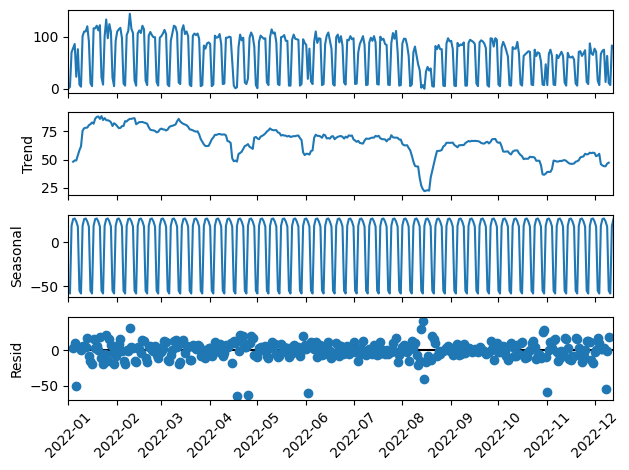

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

decompose_data_add = seasonal_decompose(route_sale_new1, model='additive')

fig = decompose_data_add.plot()

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# *After log transformation*

In [ ]:
route_sale_new1_log = np.log(route_sale_new1) + 1

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [ ]:
route_sale_new1_log

,NUMBER OF ACTUAL ORDERS
ORDER DATE,
2022-01-01,-inf
2022-01-02,2.386294
2022-01-03,5.248495
2022-01-04,5.356709
2022-01-05,5.454347
...,...
2022-12-09,5.143135
2022-12-10,3.397895
2022-12-11,2.945910


In [ ]:
#route_sale_new1_log = route_sale_new1_log.dropna()
#route_sale_new1_log = route_sale_new1_log.interpolate(method='linear')

# *SLT*

In [ ]:
stl = STL(route_sale_new1['NUMBER OF ACTUAL ORDERS']) #sesonality is 7 or 53? since data is weekly and check for year, it should be 53?
res = stl.fit()
stl.config

{'period': 7,
 'seasonal': 7,
 'seasonal_deg': 1,
 'seasonal_jump': 1,
 'trend': 15,
 'trend_deg': 1,
 'trend_jump': 1,
 'low_pass': 9,
 'low_pass_deg': 1,
 'low_pass_jump': 1,
 'robust': False}

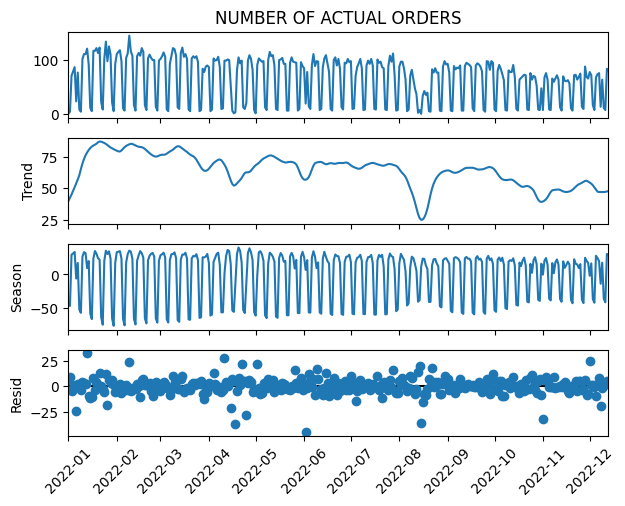

In [ ]:
res.plot();
plt.xticks(rotation=45)
plt.show()

on log data

In [ ]:
stl_ = STL(route_sale_new1_log['NUMBER OF ACTUAL ORDERS'], seasonal=7)
res_ = stl_.fit()
stl_.config

{'period': 7,
 'seasonal': 7,
 'seasonal_deg': 1,
 'seasonal_jump': 1,
 'trend': 15,
 'trend_deg': 1,
 'trend_jump': 1,
 'low_pass': 9,
 'low_pass_deg': 1,
 'low_pass_jump': 1,
 'robust': False}

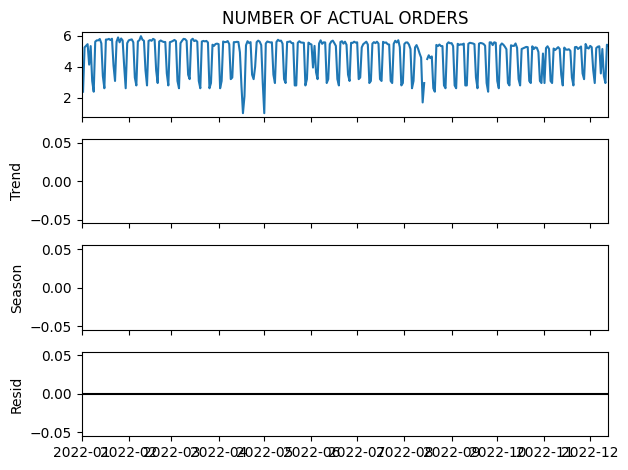

In [ ]:
res_.plot();

# **Belgium_belgium**

In [ ]:
route_sale_new2 = pd.read_excel('/content/belgium_belgium.xlsx', parse_dates=['ORDER DATE'], index_col='ORDER DATE')
route_sale_new2.drop(['ROUTE'], axis=1, inplace=True)
route_sale_new2.head()

,NUMBER OF ACTUAL ORDERS
ORDER DATE,
2022-01-01,0
2022-01-02,0
2022-01-03,0
2022-01-04,1
2022-01-05,3


In [ ]:
route_sale_new2 = route_sale_new2.groupby(route_sale_new2.index).sum()#added the repeating values

In [ ]:
route_sale_new2 = route_sale_new2.asfreq('D')

In [ ]:
#route_sale_new2.dropna(inplace=True)

In [ ]:
route_sale_new2_log = np.log(route_sale_new2)+1

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [ ]:
stl2 = STL(route_sale_new2['NUMBER OF ACTUAL ORDERS'], seasonal=7)
res2 = stl2.fit()
stl2.config

{'period': 7,
 'seasonal': 53,
 'seasonal_deg': 1,
 'seasonal_jump': 1,
 'trend': 11,
 'trend_deg': 1,
 'trend_jump': 1,
 'low_pass': 9,
 'low_pass_deg': 1,
 'low_pass_jump': 1,
 'robust': False}

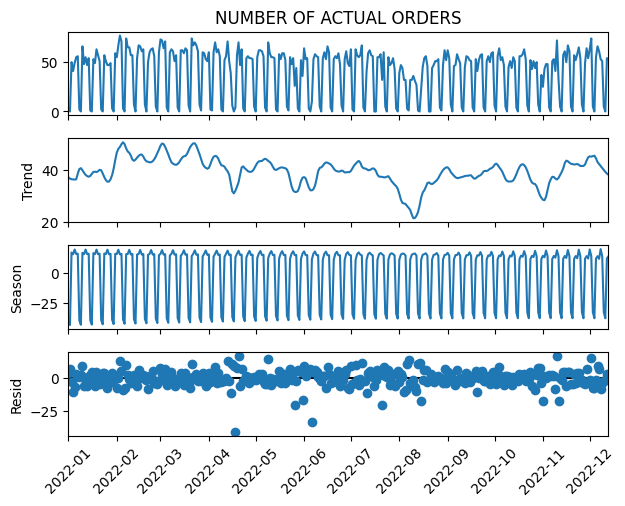

In [ ]:
res2.plot();
plt.xticks(rotation=45)
plt.show()

In [ ]:
stl2_ = STL(route_sale_new2_log['NUMBER OF ACTUAL ORDERS'], seasonal=53)
res2_ = stl2_.fit()
stl2_.config

{'period': 7,
 'seasonal': 53,
 'seasonal_deg': 1,
 'seasonal_jump': 1,
 'trend': 11,
 'trend_deg': 1,
 'trend_jump': 1,
 'low_pass': 9,
 'low_pass_deg': 1,
 'low_pass_jump': 1,
 'robust': False}

# **Great Britain Italy Northwest**

In [ ]:
route_sale_new3 = pd.read_excel('/content/Great_britain_italy_northwesy.xlsx', parse_dates=['ORDER DATE'], index_col='ORDER DATE')
route_sale_new3.drop(['ROUTE'], axis=1, inplace=True)
route_sale_new3.head()

,NUMBER OF ACTUAL ORDERS
ORDER DATE,
2022-01-01,0
2022-01-02,0
2022-01-03,1
2022-01-04,0
2022-01-05,0


In [ ]:
route_sale_new3 = route_sale_new3.groupby(route_sale_new3.index).sum()#added the repeating values

In [ ]:
route_sale_new3 = route_sale_new3.asfreq('D')

In [ ]:
#route_sale_new3.dropna(inplace=True)

In [ ]:
stl3 = STL(route_sale_new3['NUMBER OF ACTUAL ORDERS'], seasonal=7)
res3 = stl3.fit()
stl3.config

{'period': 7,
 'seasonal': 53,
 'seasonal_deg': 1,
 'seasonal_jump': 1,
 'trend': 11,
 'trend_deg': 1,
 'trend_jump': 1,
 'low_pass': 9,
 'low_pass_deg': 1,
 'low_pass_jump': 1,
 'robust': False}

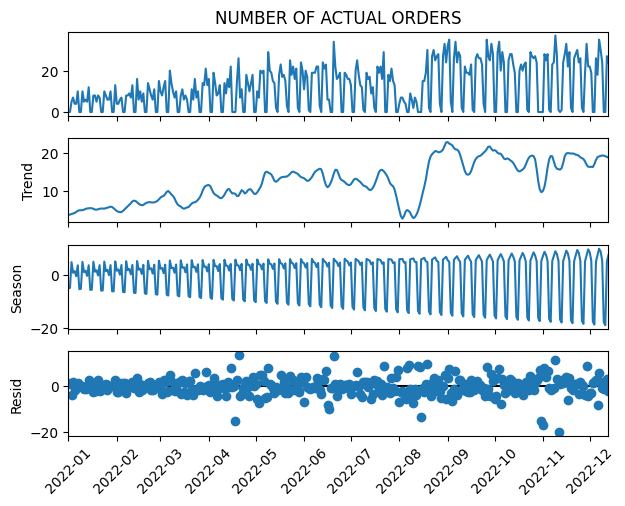

In [ ]:
res3.plot();
plt.xticks(rotation=45)
plt.show()

# **Scandinavia_italy_northwest**

In [ ]:
route_sale_new4 = pd.read_excel('/content/scandinavia_italy_northwest.xlsx', parse_dates=['ORDER DATE'], index_col='ORDER DATE')
route_sale_new4.drop(['ROUTE'], axis=1, inplace=True)
route_sale_new4.head()

,NUMBER OF ACTUAL ORDERS
ORDER DATE,
2022-01-01,0
2022-01-02,0
2022-01-03,0
2022-01-04,0
2022-01-05,1


In [ ]:
route_sale_new4 = route_sale_new4.groupby(route_sale_new4.index).sum()#added the repeating values

In [ ]:
route_sale_new4 = route_sale_new4.asfreq('D')

In [ ]:
stl3 = STL(route_sale_new4['NUMBER OF ACTUAL ORDERS'], seasonal = 7)
res3 = stl3.fit()
stl3.config

{'period': 7,
 'seasonal': 53,
 'seasonal_deg': 1,
 'seasonal_jump': 1,
 'trend': 11,
 'trend_deg': 1,
 'trend_jump': 1,
 'low_pass': 9,
 'low_pass_deg': 1,
 'low_pass_jump': 1,
 'robust': False}

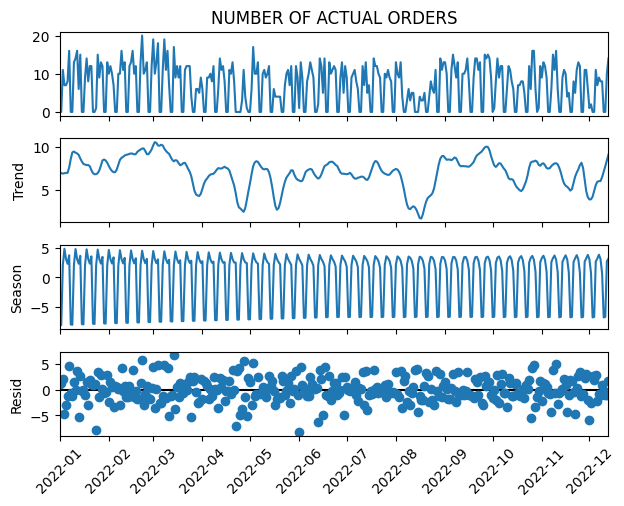

In [ ]:
res3.plot();
plt.xticks(rotation=45)
plt.show()

In [ ]:
res3.trend

,trend
ORDER DATE,
2022-01-01,7.048814
2022-01-02,6.900611
2022-01-03,6.855245
2022-01-04,6.894153
2022-01-05,6.934402
...,...
2022-12-09,6.439411
2022-12-10,7.055352
2022-12-11,7.705617


In [ ]:
route_sale_new4['trend'] = res3.trend
route_sale_new4['seasonal'] = res3.seasonal
route_sale_new4['seasonal_adjusted'] = route_sale_new4['NUMBER OF ACTUAL ORDERS']-route_sale_new4['seasonal']
route_sale_new4.head(1)

,NUMBER OF ACTUAL ORDERS,trend,seasonal,seasonal_adjusted
ORDER DATE,,,,
2022-01-01,0,7.048814,-8.057698,8.057698


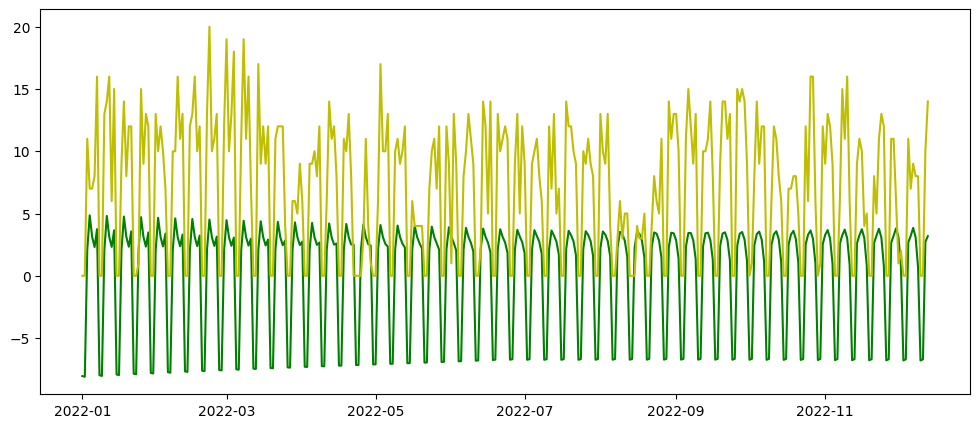

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(route_sale_new4.index,route_sale_new4['seasonal'], 'g')
plt.plot(route_sale_new4.index,route_sale_new4['NUMBER OF ACTUAL ORDERS'], 'y')

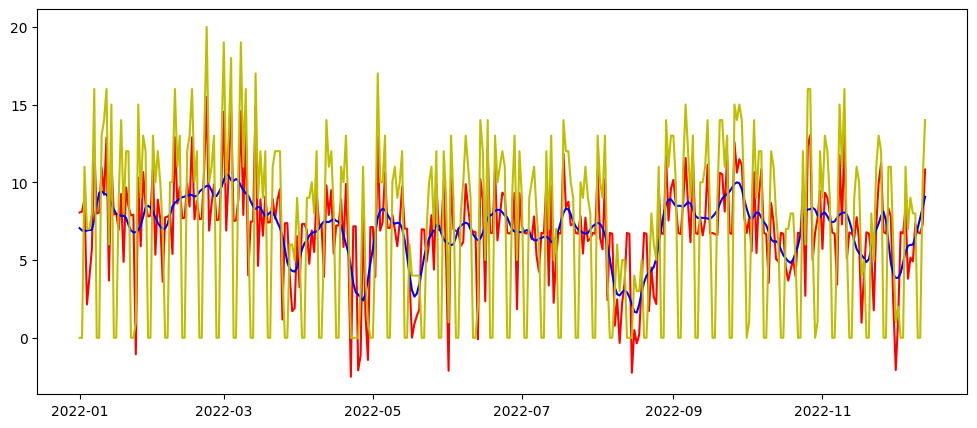

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(route_sale_new4.index,route_sale_new4['seasonal_adjusted'], 'r')
plt.plot(route_sale_new4.index,route_sale_new4['trend'], 'b')
plt.plot(route_sale_new4.index,route_sale_new4['NUMBER OF ACTUAL ORDERS'], 'y')

#**FFT and PSD**

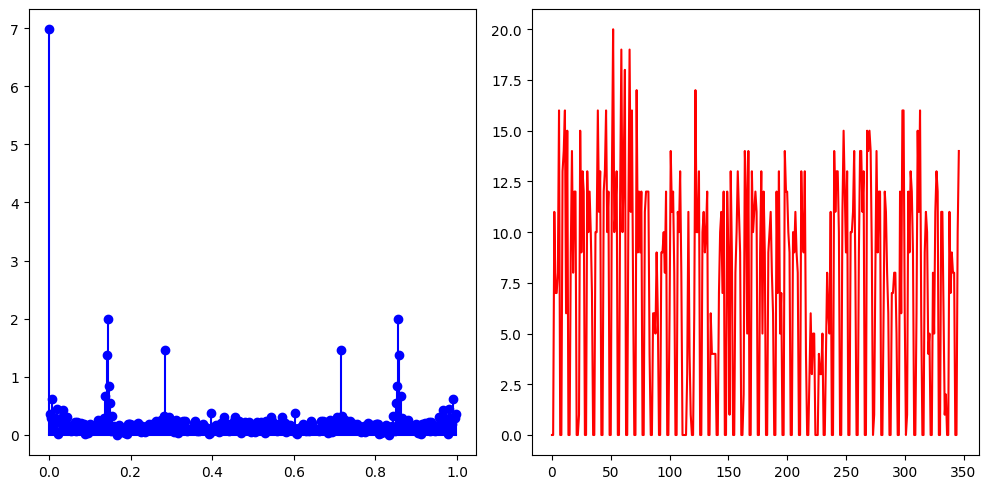

In [ ]:
from numpy.fft import fft, ifft

Fs=1
X = fft(route_sale_new4['NUMBER OF ACTUAL ORDERS'])
N = len(X)
freq_step = Fs/N;
freq_vec = np.arange(0,Fs,freq_step)

plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.stem(freq_vec, np.abs(X)/N, 'b', basefmt="-b")
#plt.xlabel('Freq (Hz)')
#plt.ylabel('FFT Amplitude |X(freq)|')

#plt.xlim(0, 10) # to visualise only the initial portion

# Inverse transformation of the DFT
plt.subplot(122)
plt.plot(ifft(X), 'r') # compute the 1D inverse DFT
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
plt.tight_layout();

Manual

total 10338.858789625356


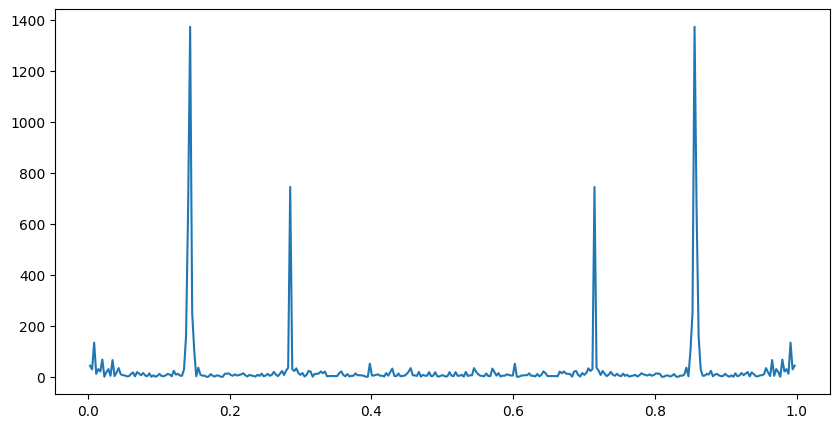

In [ ]:
#x_magnitude = np.abs(X)/N #take absolute value and normalize
#psd = x_magnitude**2#sqaure it

scale = 1/(N*Fs)
power =  scale*(abs(X**2))

freq_vec = freq_vec[1:]
power = power[1:]

plt.figure(figsize=(10,5))
plt.plot(freq_vec,power)

print('total', power.sum())

In [ ]:
temp_ = np.where(power == power.max())
print('Frequency for the maximum value is: ',float(freq_vec[temp_]))
print('Period (months/cycle): ',float(1/freq_vec[temp_]))

Frequency for the maximum value is:  0.1440922190201729
Period (months/cycle):  6.9399999999999995


<ipython-input-313-ac7ea3be5433>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Frequency for the maximum value is: ',float(freq_vec[temp_]))
<ipython-input-313-ac7ea3be5433>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Period (months/cycle): ',float(1/freq_vec[temp_]))


Periodogram

Total sum Density: 10338.858789625356


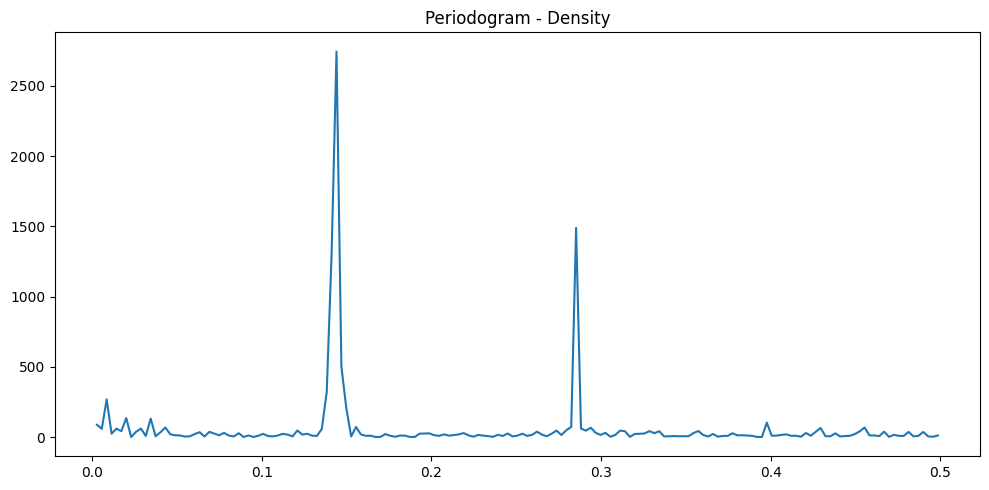

In [ ]:
from scipy.signal import periodogram

f_per_density, Pxx_per_density = periodogram(route_sale_new4['NUMBER OF ACTUAL ORDERS'],
                                              Fs, detrend=False, window='boxcar',
                                              nfft=None, return_onesided=True, scaling='density')

f_per_density = f_per_density[1:]
Pxx_per_density = Pxx_per_density[1:]


plt.figure(figsize=(10,5))
plt.plot(f_per_density, Pxx_per_density)
plt.title('Periodogram - Density')
plt.xlabel='Frequency (Hz)'
plt.ylabel='Power Spectral Density (PSD)'

print('Total sum Density:', Pxx_per_density.sum())

plt.tight_layout()
plt.show()

In [ ]:
temp = np.where(Pxx_per_density == Pxx_per_density.max())
print('Frequency for the maximum value is: ',float(f_per_density[temp]))
print('Period (months/cycle): ',float(1/f_per_density[temp]))

Frequency for the maximum value is:  0.1440922190201729
Period (months/cycle):  6.9399999999999995


<ipython-input-312-b6da6401bc01>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Frequency for the maximum value is: ',float(f_per_density[temp]))
<ipython-input-312-b6da6401bc01>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Period (months/cycle): ',float(1/f_per_density[temp]))


Welch

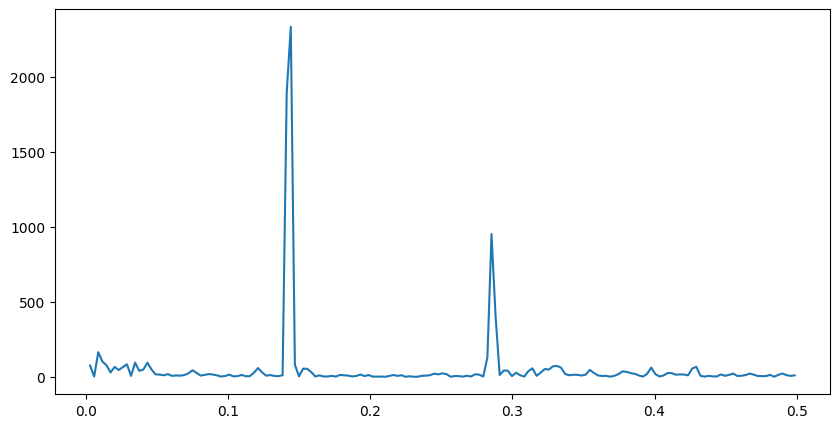

total density 9176.183109306205


In [ ]:
from scipy.signal import welch

f_welch_density, Pxx_welch_density = welch(route_sale_new4['NUMBER OF ACTUAL ORDERS'],Fs, window='hann', noverlap=None, nperseg=512, return_onesided=True, scaling='density')

f_welch_density = f_welch_density[1:]
Pxx_welch_density = Pxx_welch_density[1:]

plt.figure(figsize=(10,5))
plt.plot(f_welch_density, Pxx_welch_density)
plt.show()

print('total density', Pxx_welch_density.sum())

In [ ]:
# Group by week and route, summing the 'NUMBER OF ACTUAL ORDERS'
df_weekly_ = route_sale_df.groupby([pd.Grouper(key='ORDER DATE', freq='W'), 'ROUTE'])['NUMBER OF ACTUAL ORDERS'].sum().reset_index()

# Rename columns appropriately
df_weekly_.rename(columns={'ORDER DATE': 'WEEK', 'NUMBER OF ACTUAL ORDERS': 'WEEKLY ORDERS'}, inplace=True)


# Set 'WEEK' as the index
df_weekly_.set_index('WEEK', inplace=True)


# Check the result
df_weekly_.head()

,ROUTE,WEEKLY ORDERS
WEEK,,
2022-01-02,BELGIUM__BELGIUM,1
2022-01-02,BELGIUM__EAST_BALCAN,0
2022-01-02,BELGIUM__GERMANY_RUHR,0
2022-01-02,BELGIUM__GREAT_BRITAIN,0
2022-01-02,BELGIUM__ITALY_NORTH_EAST_CENTER,0


In [ ]:
df_weekly_.sort_values(by=['ROUTE', 'WEEK'], inplace=True)

# Group by Route and calculate the difference in Weekly Count compared to the previous week
df_weekly_['Weekly Difference'] = df_weekly_.groupby('ROUTE')['WEEKLY ORDERS'].diff().fillna(0).astype(int)
df_weekly_.head(5)

,ROUTE,WEEKLY ORDERS,Weekly Difference
WEEK,,,
2022-01-02,BELGIUM__BELGIUM,1,0
2022-01-09,BELGIUM__BELGIUM,253,252
2022-01-16,BELGIUM__BELGIUM,271,18
2022-01-23,BELGIUM__BELGIUM,275,4
2022-01-30,BELGIUM__BELGIUM,254,-21


<ipython-input-7-858796d6f9f0>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


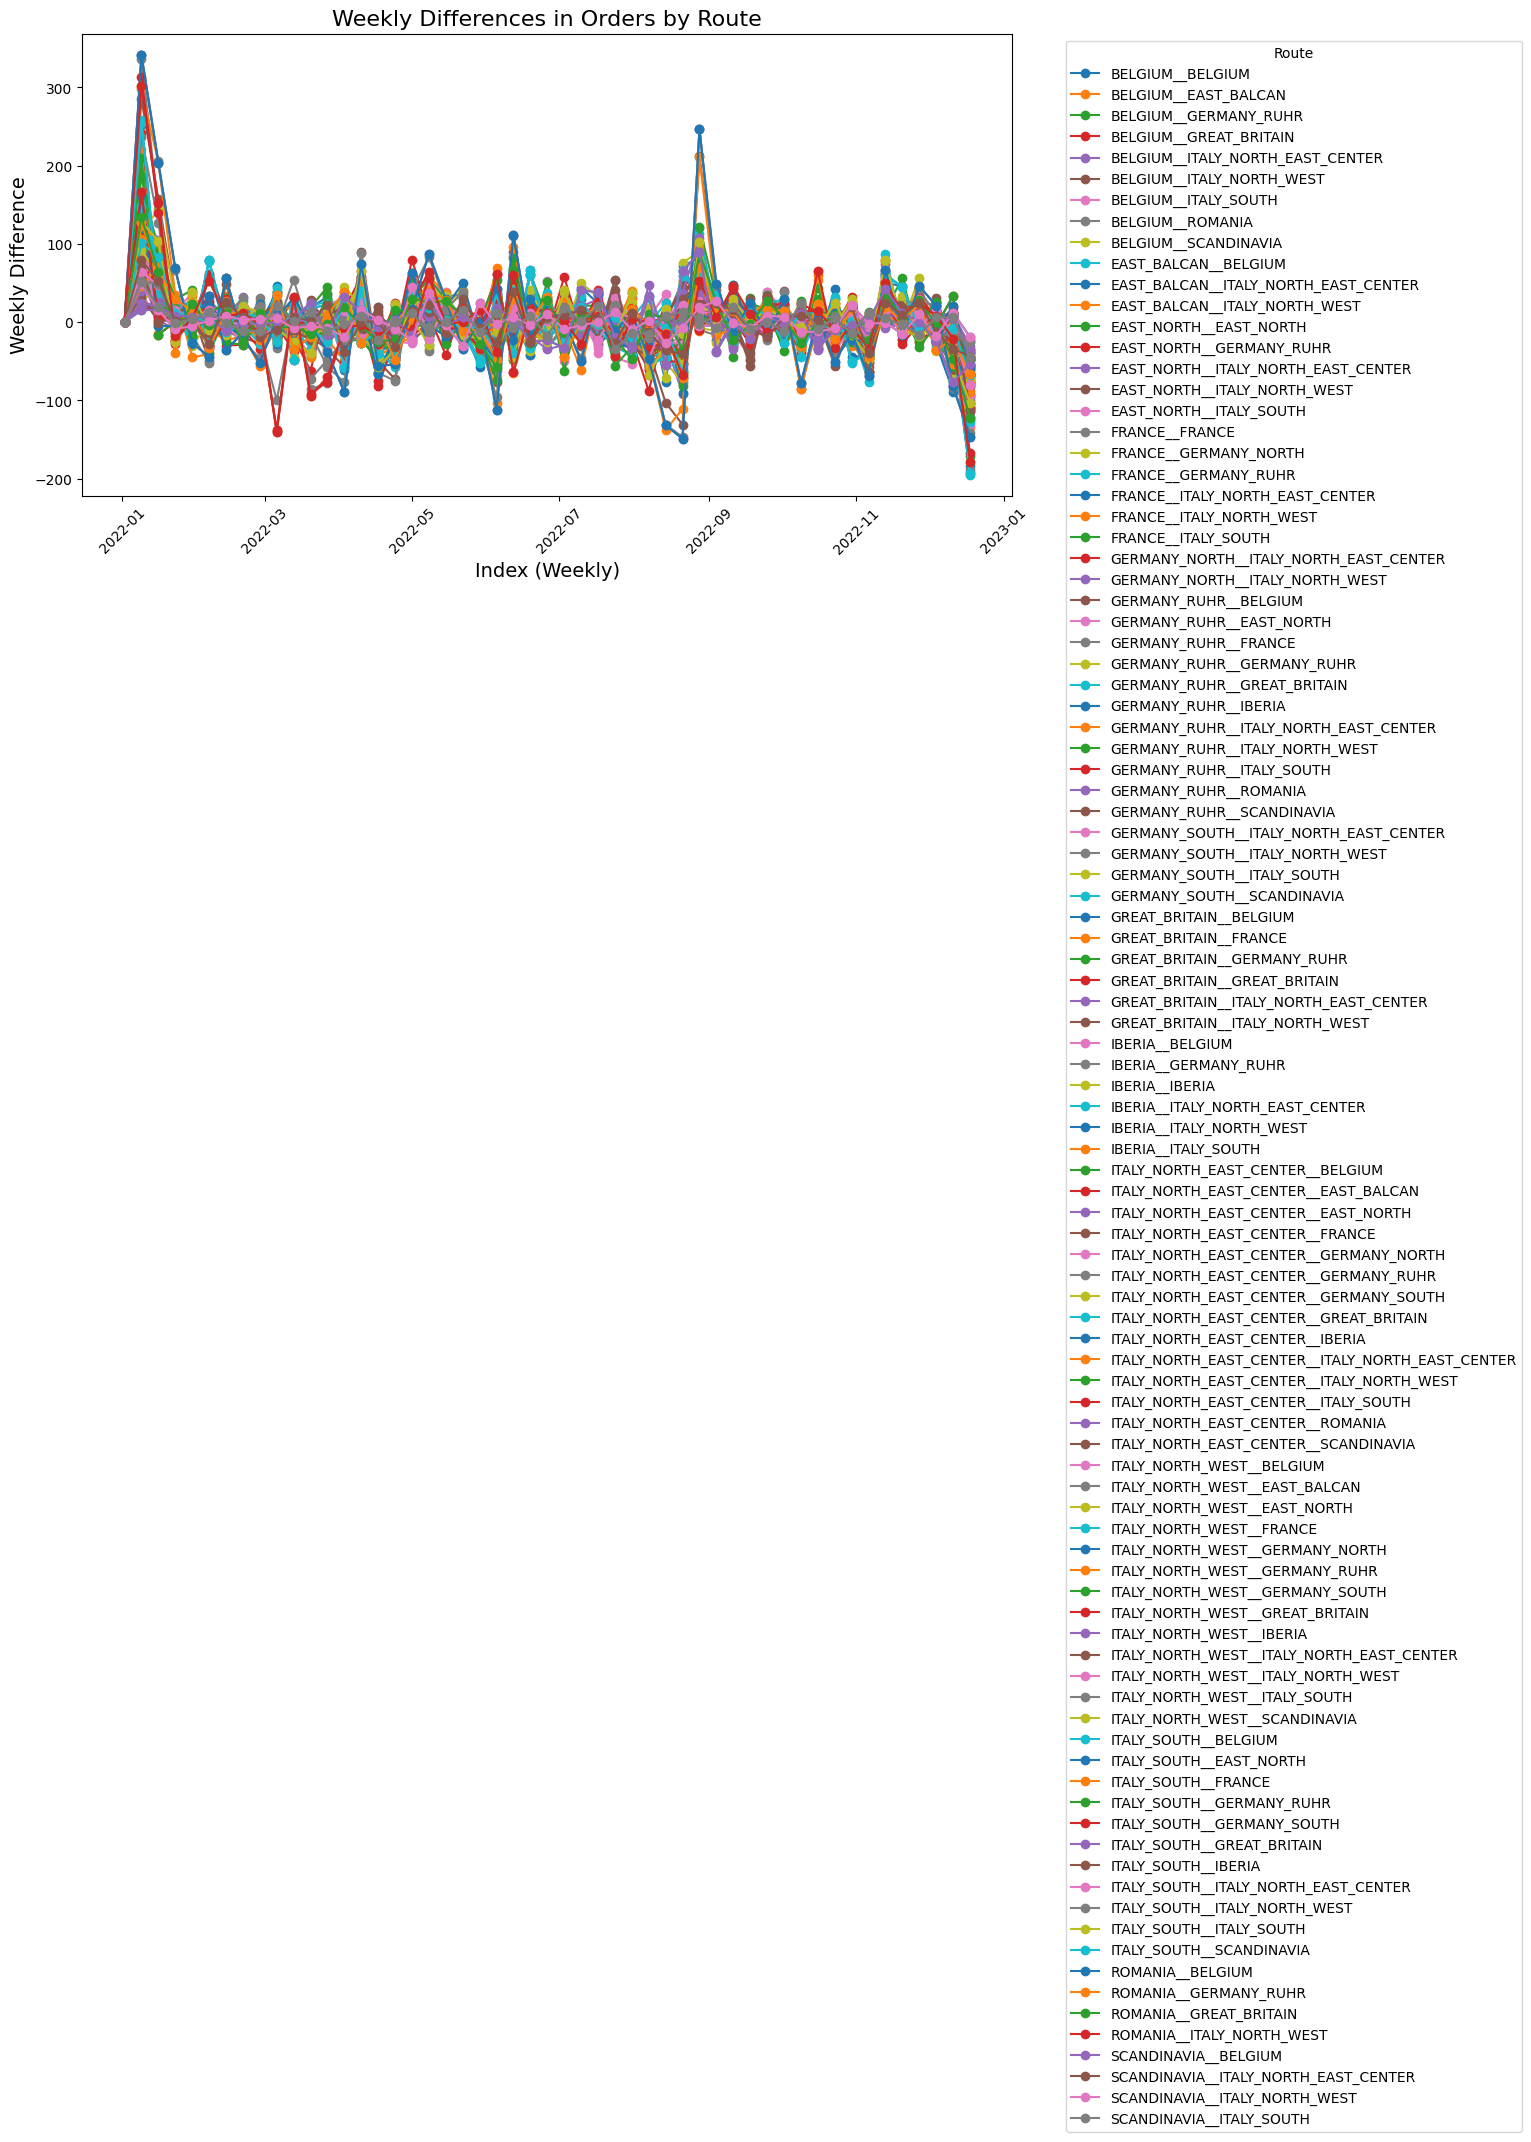

In [ ]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Loop through each route and plot its data
for route, group in df_weekly_.groupby('ROUTE'):
    plt.plot(group.index, group['Weekly Difference'], label=route, marker='o')

# Add labels and title
plt.title('Weekly Differences in Orders by Route', fontsize=16)
plt.xlabel('Index (Weekly)', fontsize=14)
plt.ylabel('Weekly Difference', fontsize=14)

# Add a legend to distinguish routes
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_weekly_['Signed Log Weekly Difference'] = df_weekly_['Weekly Difference'].apply(
    lambda x: np.sign(x) * np.log(abs(x) + 1)  # Add 1 to avoid log(0)
)

df_weekly_.head()




,ROUTE,WEEKLY ORDERS,Weekly Difference,Signed Log Weekly Difference
WEEK,,,,
2022-01-02,BELGIUM__BELGIUM,1,0,0.000000
2022-01-09,BELGIUM__BELGIUM,253,252,5.533389
2022-01-16,BELGIUM__BELGIUM,271,18,2.944439
2022-01-23,BELGIUM__BELGIUM,275,4,1.609438
2022-01-30,BELGIUM__BELGIUM,254,-21,-3.091042


<ipython-input-9-86fb6538645b>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


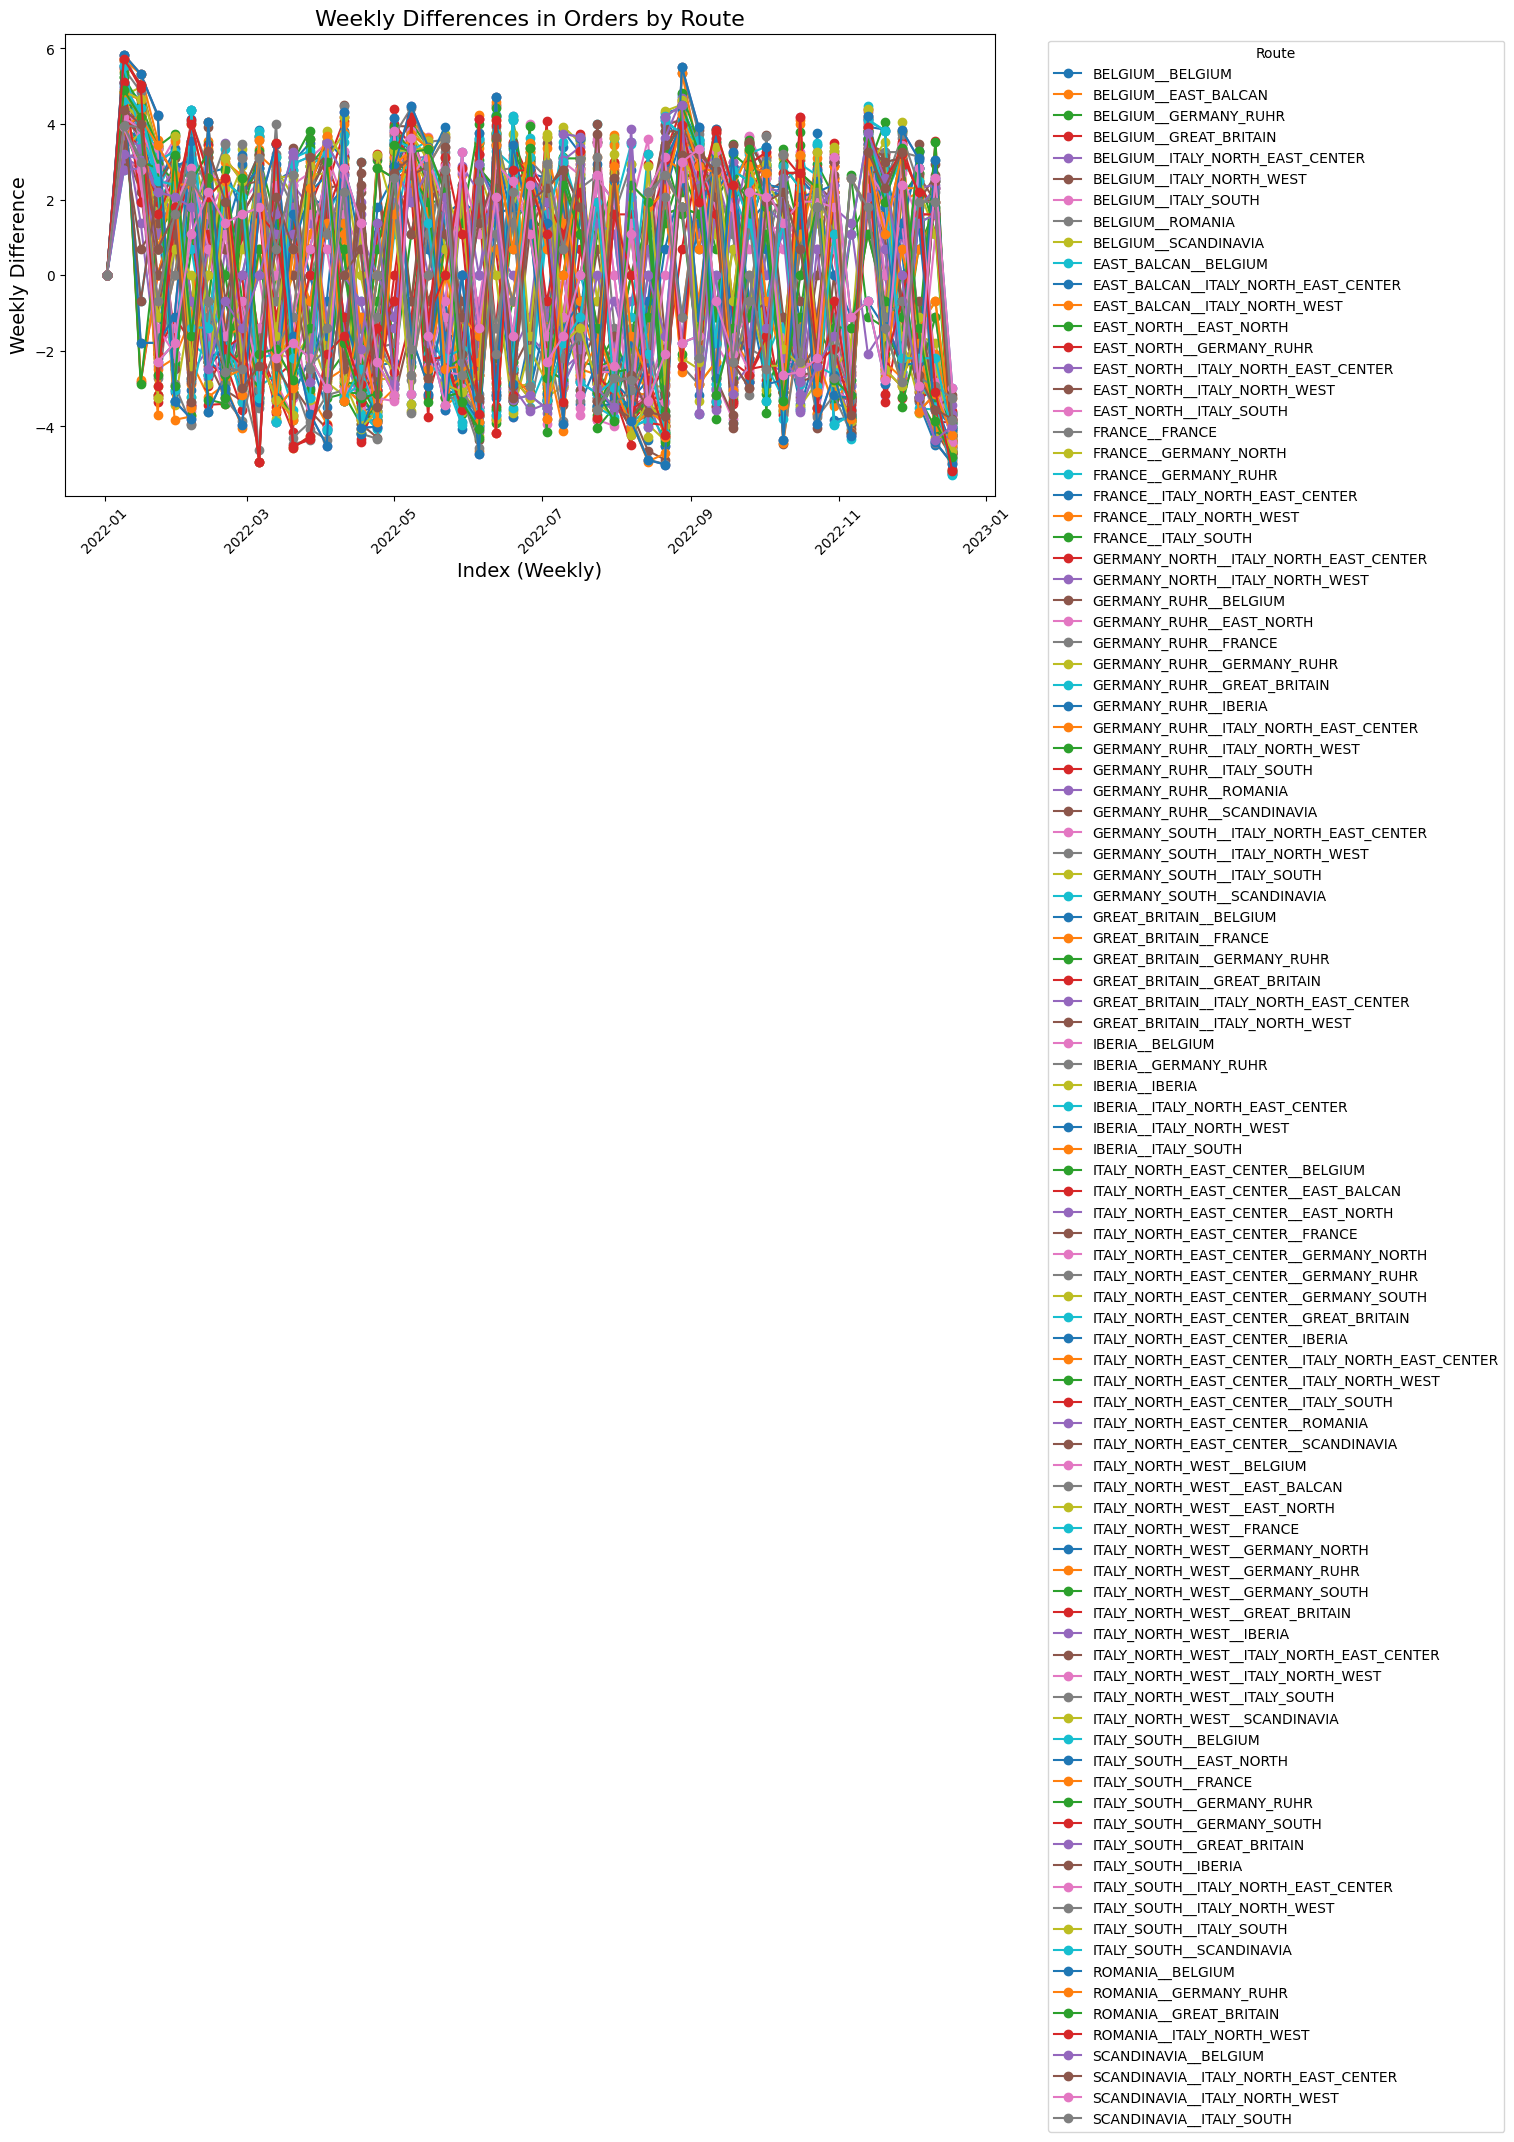

In [ ]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Loop through each route and plot its data
for route, group in df_weekly_.groupby('ROUTE'):
    plt.plot(group.index, group['Signed Log Weekly Difference'], label=route, marker='o')

# Add labels and title
plt.title('Weekly Differences in Orders by Route', fontsize=16)
plt.xlabel('Index (Weekly)', fontsize=14)
plt.ylabel('Weekly Difference', fontsize=14)

# Add a legend to distinguish routes
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Reset the index to avoid multi-level index issues
#df_weekly_ = df_weekly_.reset_index
from statsmodels.tsa.seasonal import seasonal_decompose
# Define a function to perform decomposition for each route
def decompose_route(group):
    decomposition = seasonal_decompose(group['Signed Log Weekly Difference'], model='additive', period=7)
    group['trend'] = decomposition.trend
    group['seasonal'] = decomposition.seasonal
    group['seasonally_adjusted'] = group['Signed Log Weekly Difference'] - group['seasonal']
    return group

specific_route = 'GREAT_BRITAIN__GREAT_BRITAIN'
route_data = df_weekly_[df_weekly_['ROUTE'] == specific_route]


# Apply decomposition to each route
df_weekly_ = route_data.apply(decompose_route)

# Visualize decomposition for a specific route (e.g., "BELGIUM__BELGIUM")

# Plot the decomposition for the specific route
plt.figure(figsize=(12, 8))
plt.plot(route_data['WEEK'], route_data['Signed Log Weekly Difference'], label='Original Data')
plt.plot(route_data['WEEK'], route_data['trend'], label='Trend Component')
plt.plot(route_data['WEEK'], route_data['seasonally_adjusted'], label='Seasonally Adjusted Data')
plt.legend()
plt.title(f"Decomposition for Route: {specific_route}")
plt.xlabel('Week')
plt.ylabel('Log-Transformed Weekly Difference')
plt.show()



TypeError: 'method' object is not subscriptable